In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns 

In [46]:
# csv with adjusted MKTCAP
# ALLDF['時価総額']*(ALLDF['発行済株式数']-ALLDF['自己株式数'])/ALLDF['発行済株式数']
raw = pd.read_csv('MKTCAP_LN.csv', encoding = 'cp932').dropna()
raw.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,AAL,0.0000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,...,4722.000,-4027.000,11819.000,12514.000,0.189228,inf,inf,0.114236,0.401220,0.0000
1,2000,ABF,3385.8000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,...,1022.000,-735.000,1459.000,1746.000,0.187285,0.096580,0.265137,0.111833,0.092430,3385.8000
2,2000,ACL,121.9050,245.360,13.484,8.232,146.453,8.461,0.000,86.766,...,78.305,-54.935,9.342,32.712,0.412203,0.110611,0.481594,0.390139,0.092395,121.9050
3,2000,ADB,0.0000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,...,6.352,-5.785,16.087,16.654,0.146992,inf,inf,0.185581,0.528041,0.0000
4,2000,ADN,846.9825,115.721,34.225,24.126,274.148,45.815,3.054,91.628,...,42.759,-81.432,11.307,-27.366,-1.250639,0.040408,-1.085167,0.306294,0.041408,846.9825


In [103]:
# any zero or blow zero MKTCAP values
raw[raw['MKTCAP'] < 0][['security_code', '時価総額', 'MKTCAP']].head()

print (raw.shape)
raw[raw['MKTCAP'] == 0][['security_code', '時価総額', 'MKTCAP']].shape

(13620, 76)


(3987, 3)

In [104]:
# csv with unadjusted MKTCAP
df = pd.read_csv('sqldataln.csv', encoding = 'cp932')
print (df.shape)
df.head()

(502814, 5)


,security_code,ddate,quarter,title,value
0,7DIG,2001,200101,ANNOUNCEMENT_DT,2.001070e+07
1,7DIG,2001,200101,BS_ACCT_NOTE_RCV,6.470000e-01
2,7DIG,2001,200101,BS_ACCT_PAYABLE,3.200000e-01
3,7DIG,2001,200101,BS_CASH_NEAR_CASH_ITEM,2.368000e+00
4,7DIG,2001,200101,BS_CUR_ASSET_REPORT,3.393000e+00


In [49]:
# aal = df[df['security_code'] == 'AAL']
# aal[aal['title'] == 'HISTORICAL_MARKET_CAP']

In [50]:
new = pd.merge(raw, df, how = 'left', left_on = ['security_code', 'ddate'], right_on = ['security_code', 'ddate'])

In [105]:
unadjust = new[new['title'] == 'HISTORICAL_MARKET_CAP'].dropna()
unadjust.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP,quarter,title,value
21,2000,AAL,0.0000,14824.000,2368.000,1957.000,30616.000,1061.000,2344.000,8127.000,...,12514.000,0.189228,inf,inf,0.114236,0.401220,0.0000,200001,HISTORICAL_MARKET_CAP,22469.2680
51,2000,ABF,3385.8000,4406.000,327.000,138.000,3867.000,65.000,1133.000,2220.000,...,1746.000,0.187285,0.096580,0.265137,0.111833,0.092430,3385.8000,200001,HISTORICAL_MARKET_CAP,2652.1079
80,2000,ACL,121.9050,245.360,13.484,8.232,146.453,8.461,0.000,86.766,...,32.712,0.412203,0.110611,0.481594,0.390139,0.092395,121.9050,200001,HISTORICAL_MARKET_CAP,116.6681
109,2000,ADB,0.0000,32.645,2.448,1.466,23.528,0.412,0.000,6.764,...,16.654,0.146992,inf,inf,0.185581,0.528041,0.0000,200001,HISTORICAL_MARKET_CAP,20.2960
138,2000,ADN,846.9825,115.721,34.225,24.126,274.148,45.815,3.054,91.628,...,-27.366,-1.250639,0.040408,-1.085167,0.306294,0.041408,846.9825,200001,HISTORICAL_MARKET_CAP,884.2819


In [116]:
# any zero or below zero MKTCAP vlaue 
mktcap_value = unadjust[unadjust['title'] == 'HISTORICAL_MARKET_CAP'][['security_code', 'value']]
mktcap_value[mktcap_value['value'] == 0]
print(raw.shape)
print (unadjust.shape)
mktcap_value[mktcap_value['value'] < 0]

(13620, 76)
(13236, 79)


,security_code,value


In [148]:
collist = unadjust.columns.tolist()
raw2 = unadjust.drop(collist[-9: -1], axis = 1)

# x = data.iloc[:, :-1]
# y = data['value']

In [118]:
# l = []
# for i in range(len(raw['security_code'])):
#     if np.unique(raw['security_code'])[i] != np.unique(unadjust['security_code'])[i]:
#         print (i)
#         l.append(i)

(13236, 71)

In [119]:
raw2.groupby('ddate').count()

,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,value
ddate,,,,,,,,,,,,,,,,,,,,,
2000,439,439,439,439,439,439,439,439,439,439,...,439,439,439,439,439,439,439,439,439,439
2001,467,467,467,467,467,467,467,467,467,467,...,467,467,467,467,467,467,467,467,467,467
2002,484,484,484,484,484,484,484,484,484,484,...,484,484,484,484,484,484,484,484,484,484
2003,486,486,486,486,486,486,486,486,486,486,...,486,486,486,486,486,486,486,486,486,486
2004,540,540,540,540,540,540,540,540,540,540,...,540,540,540,540,540,540,540,540,540,540
2005,620,620,620,620,620,620,620,620,620,620,...,620,620,620,620,620,620,620,620,620,620
2006,714,714,714,714,714,714,714,714,714,714,...,714,714,714,714,714,714,714,714,714,714
2007,778,778,778,778,778,778,778,778,778,778,...,778,778,778,778,778,778,778,778,778,778
2008,826,826,826,826,826,826,826,826,826,826,...,826,826,826,826,826,826,826,826,826,826


In [120]:
# remove all zero columns. i.e. keep columns that have all zero values 
data = raw2.loc[:, (raw2 != 0).any(axis = 0)]

# only keep the companeis that exist in both 2014 and 2015
x_2015= data[data['ddate'] == 2015].drop('value', axis = 1)
y_2016 = data[data['ddate'] == 2016][['security_code','value']]

data2 = pd.merge(x_2015, y_2016, how = 'inner', on = ['security_code'])
print (data2.shape)

(1060, 62)


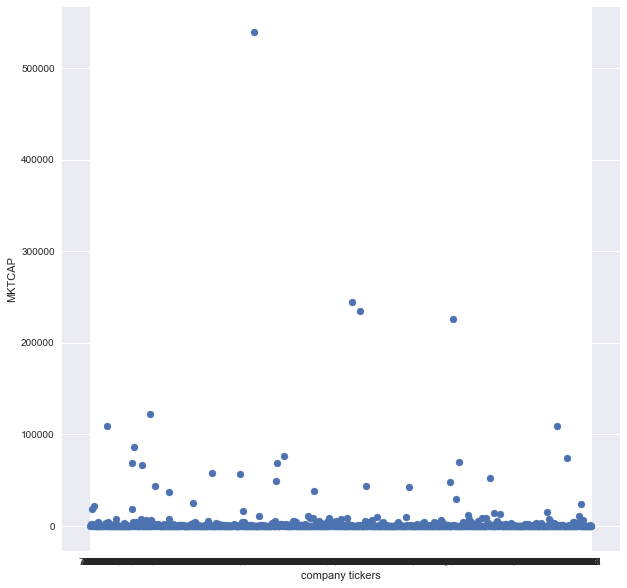

In [121]:
fig = plt.figure(figsize = (10, 10))

num = len(data2['security_code'])
x_plot = np.arange(num)
y_plot = data2['value']
my_ticks = list(data2['security_code'].values)

plt.xticks(x_plot, my_ticks)
plt.scatter(x_plot, y_plot)

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [122]:
data2['value'].describe()

count      1060.000000
mean       3314.049922
std       22818.849173
min           0.038700
25%          19.131375
50%         107.687400
75%         740.914625
max      539463.030000
Name: value, dtype: float64

In [123]:
data2.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,value
0,2015,7DIG,0.0000,10.365,1.742,-7.913,7.339,1.656,0.0,6.220,...,-5.315,0.680849,0.168066,0.0,1.656,4.564,-3.974,0.703,1.293,7.3014
1,2015,888,0.0000,462.100,40.800,29.500,386.300,178.600,0.0,214.200,...,40.800,0.000000,0.088293,0.0,181.000,35.600,-222.400,11.200,-175.600,960.6034
2,2015,AA/,0.0000,984.000,325.000,69.000,1958.000,302.000,0.0,495.000,...,-313.000,0.648374,0.330285,0.0,-2940.000,193.000,-471.000,100.000,-178.000,1790.4874
3,2015,AAL,5131.8597,20455.000,-4261.000,-5624.000,52013.000,6895.000,0.0,13797.000,...,-3237.000,-0.050061,-0.208311,0.0,-10226.000,6902.000,-4207.000,29621.000,32316.000,18308.3621
4,2015,AAZ,12.1111,78.057,-2.940,-7.381,172.041,0.249,0.0,42.577,...,-5.763,0.036166,-0.037665,0.0,-49.047,42.328,-20.112,112.288,134.504,33.3792


In [124]:
data2[data2['value'] == np.max(data2['value'])]

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,value
346,2015,FIVE,0.0,808818.0,37281.0,14174.0,402115.0,8958.0,0.0,108705.0,...,-161109.0,0.245284,0.046093,0.0,-130429.0,99747.0,-148210.0,189000.0,140537.0,539463.03


In [125]:
features = data2.iloc[:, 3: 61].columns
features

Index(['売上', '営業利益', '純利益', '総資産', '現金･現金同等物', '有価証券', '流動資産', '総長期投資',
       '有形固定資産', '短期借入金', '長期借入金', '流動負債', '無形資産', '未払税金', '短期繰延税金資産', '長期貸付金',
       '従業員数', '自己株式の取得', '売上総利益', '土地2', '売掛金', '棚卸', '買掛金', 'のれん･営業権',
       '貸倒引当金', '剰余金', '資本金', '売上原価', '負債合計', '自己資本', '未払費用', '長期繰延税金負債',
       '長期借入金(当期返済分)', '少数持分', '自己株金額', '人件費', '税引前利益', '非流動資産合計', '自己株式数',
       '発行済株式数', '流動資産その他', '投資資産', '無形資産その他', '投資資産その他', '流動負債その他', '固定負債',
       '固定負債その他', '自己資本その他', '株主資本', '販管費', '売上総利益率', '営業利益率', '株主還元', '純現金資産',
       '営業資産', '営業負債', '有形固定', '使用資産'],
      dtype='object')

In [130]:
print(raw.shape)
print (unadjust.shape)
print (raw2.shape)

(13620, 76)
(13236, 79)
(13236, 71)


In [61]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


NameError: name 'X_transform' is not defined

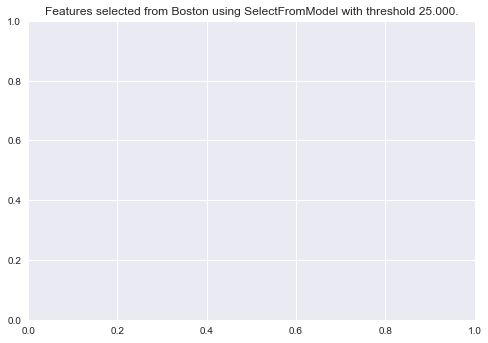

In [62]:
X, y = data1.iloc[:, 3: 61], data1.iloc[:, 61]

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold =  25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 10
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [ ]:
X_transform.shape

In [63]:
data1 = data2.replace([float('-inf'), float('inf')], np.nan).dropna()

In [64]:
print (data2.shape)
print (data1.shape)

(1060, 62)
(1059, 62)


# check for difference between the rows from two dataset 

In [ ]:
for i in range(raw.shape[0]):
    raw.iloc[i]
    

In [ ]:
data1.columns

# LASSO

In [65]:
features

Index(['売上', '営業利益', '純利益', '総資産', '現金･現金同等物', '有価証券', '流動資産', '総長期投資',
       '有形固定資産', '短期借入金', '長期借入金', '流動負債', '無形資産', '未払税金', '短期繰延税金資産', '長期貸付金',
       '従業員数', '自己株式の取得', '売上総利益', '土地2', '売掛金', '棚卸', '買掛金', 'のれん･営業権',
       '貸倒引当金', '剰余金', '資本金', '売上原価', '負債合計', '自己資本', '未払費用', '長期繰延税金負債',
       '長期借入金(当期返済分)', '少数持分', '自己株金額', '人件費', '税引前利益', '非流動資産合計', '自己株式数',
       '発行済株式数', '流動資産その他', '投資資産', '無形資産その他', '投資資産その他', '流動負債その他', '固定負債',
       '固定負債その他', '自己資本その他', '株主資本', '販管費', '売上総利益率', '営業利益率', '株主還元', '純現金資産',
       '営業資産', '営業負債', '有形固定', '使用資産'],
      dtype='object')

In [66]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test =  train_test_split(data1[features], data1['value'], test_size = 0.2, random_state = 0)


In [67]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
reg.score(x_test, y_test)

0.68776951864976343

In [75]:
selected = features[reg.coef_ > 0.01]

print (len(selected))
print (len(features))

30
58


# CV

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

from sklearn.metrics import make_scorer 

In [145]:
# testing error estimation of the LASSO just fitted before for feature selection 

kf = 10

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(reg, data1[features], data1['value'], cv = kf, scoring = MSE))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

475130435.03126669

# Tune LASSO

In [136]:
from sklearn.linear_model import LassoLarsCV

model = LassoLarsCV(cv = 10, precompute=False).fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=5.188e+00, previous alpha=3.351e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 62 iterations, alpha=1.523e+01, previous alpha=2.732e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 51 iterations, i.e. alpha=1.122e+00, with an active set of 29 regressors, and

In [149]:
model.score(x_test, y_test)

0.62605608141036884

In [147]:
features[model.coef_ > 0.01]

Index(['営業利益', '長期借入金', '無形資産', '売掛金', '棚卸', 'のれん･営業権', '剰余金', '長期繰延税金負債',
       '税引前利益', '非流動資産合計', '流動負債その他'],
      dtype='object')

In [137]:
tuned = features[model.coef_ > 0.01]

print (len(tuned))
print (len(features))

11
58


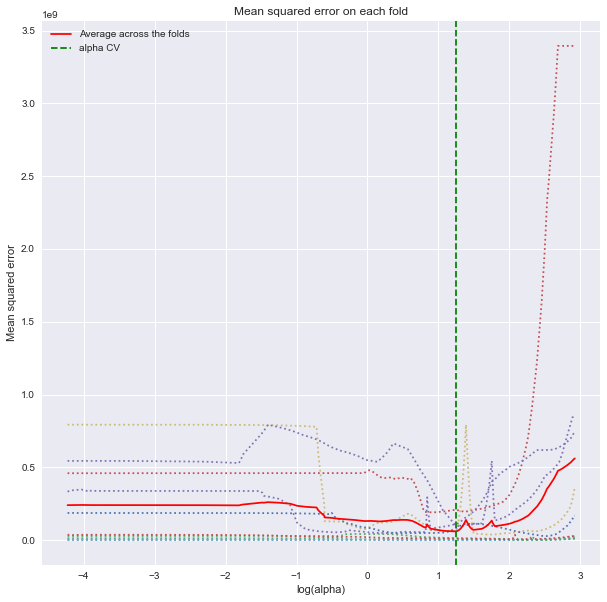

In [138]:
# plot mean square error for each fold

m_log_alphascv = np.log10(model.cv_alphas_)

fig = plt.figure(figsize = (10, 10))

plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis = -1), 'red', label = 'Average across the folds')
plt.axvline(np.log10(model.alpha_), linestyle = '--', color = 'green', label = 'alpha CV')

plt.legend()
plt.xlabel('log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

plt.show()

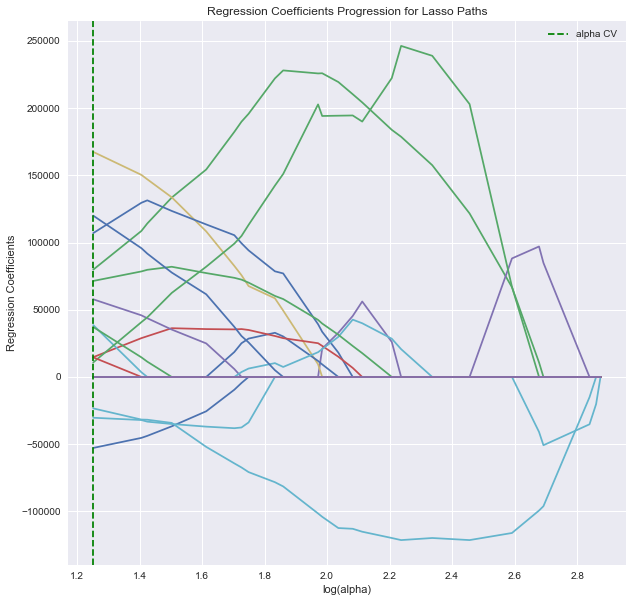

In [139]:
# plot coefficient progression

fig = plt.figure(figsize = (10, 10))
m_log_alphas = np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(np.log10(model.alpha_), linestyle = '--', color = 'green', label = 'alpha CV')
plt.ylabel('Regression Coefficients')
plt.legend()
plt.xlabel('log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

plt.show()

# CV on tuned LASSO 

In [142]:
# model
folds      = [10, 20, 50, 100, 150, 200, 250]
n_folds    = len(folds)
MSE_tuned  = []
n = data1[features].shape[0]

MSE = make_scorer(mean_squared_error)

# Run K-folds
for k in folds:

    scores = cross_val_score(model, data1[features], data1['value'], cv = k, scoring = MSE)
    MSE_tuned .append(scores.mean())

    print("K = {}, MSE_tuned : {}".format (k, MSE_tuned[-1]))
    
    
# Print chart
fig = plt.figure(figsize = (10, 10))
plt.errorbar(range(1, n_folds + 1), MSE_tuned , yerr=[5] * n_folds)  # Use 5% for the error bars
ax = plt.gca()
plt.xticks(range(0, n_folds + 2), [''] + [str(k) for k in folds] + [''])
# plt.yticks(range(30, 110, 10))

plt.title("K-fold Cross-validation testing error estimation")
plt.xlabel("number of folds")
plt.ylabel("MSE_tuned ")

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 72 iterations, alpha=8.692e+01, previous alpha=1.787e-01, with an active set of 39 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=2.632e-01, previous alpha=2.055e-01, with an active set of 37 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 83 iterations, alpha=7.19

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 58 iterations, i.e. alpha=5.501e-01, with an active set of 32 regressors, and the smallest cholesky pivot element being 3.332e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 59 iterations, i.e. alpha=4.616e-01, with an active set of 33 regressors, and the smallest cholesky pivot element being 3.942e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 60 iterations, alpha=5.083e-01, previous alpha=4.568e-01, w

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 78 iterations, alpha=1.447e+00, previous alpha=9.152e-02, with an active set of 41 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=3.716e+01, previous alpha=1.892e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 85 iterations, alpha=5.11

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 75 iterations, alpha=1.320e+02, previous alpha=2.196e-01, with an active set of 38 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=1.341e+02, previous alpha=4.814e-01, with an active set of 31 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 83 iterations, alpha=6.31

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 81 iterations, alpha=4.324e+01, previous alpha=1.695e-06, with an active set of 42 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 76 iterations, alpha=4.698e+01, previous alpha=3.351e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 76 iterations, alpha=3.12

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 60 iterations, i.e. alpha=3.042e-01, with an active set of 34 regressors, and the smallest cholesky pivot element being 4.215e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 72 iterations, i.e. alpha=1.034e-01, with an active set of 38 regressors, and the smallest cholesky pivot element being 2.581e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 72 iterations, i.e. alpha=1.033e-01, with an active set of 38 regressors, and the smallest cholesky pivot eleme

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 47 iterations, i.e. alpha=1.836e+00, with an active set of 27 regressors, and the smallest cholesky pivot element being 4.081e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 68 iterations, i.e. alpha=5.037e-01, with an active set of 32 regressors, and the smallest cholesky pivot element being 3.942e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 68 iterations, i.e. alpha=5.030e-01, with an active set of 32 regressors, and the smallest cholesky pivot eleme

K = 10, MSE_tuned : 75262252.11746648


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 101 iterations, alpha=3.851e-05, previous alpha=3.851e-05, with an active set of 42 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 77 iterations, alpha=9.786e+01, previous alpha=1.730e-03, with an active set of 40 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 54 iterations, i.e. alpha=9.152e-01, with an active set of 26 regressors, an

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 34 iterations, i.e. alpha=1.541e+00, with an active set of 26 regressors, and the smallest cholesky pivot element being 9.424e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=8.060e-01, with an active set of 30 regressors, and the smallest cholesky pivot element being 9.771e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=8.023e-01, with an active set of 30 regressors, and the smallest cholesky pivot eleme

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 68 iterations, alpha=1.332e+02, previous alpha=2.921e-01, with an active set of 37 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 68 iterations, alpha=5.024e+01, previous alpha=5.740e-01, with an active set of 33 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=2.00

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 76 iterations, alpha=1.829e+02, previous alpha=5.170e-02, with an active set of 41 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 79 iterations, alpha=2.150e+02, previous alpha=1.010e-01, with an active set of 40 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=5.27

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 77 iterations, alpha=5.427e+01, previous alpha=2.663e-01, with an active set of 38 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 67 iterations, i.e. alpha=4.643e-01, with an active set of 33 regressors, and the smallest cholesky pivot element being 9.541e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 68 iterations, i.e. alpha=4.639e-01, with an active set of 34 regressors, and the smallest cho

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 89 iterations, alpha=1.181e+01, previous alpha=8.691e-05, with an active set of 42 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 80 iterations, alpha=1.430e+00, previous alpha=1.975e-01, with an active set of 41 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=3.15

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=3.319e-05, with an active set of 42 regressors, and the smallest cholesky pivot element being 7.300e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=3.316e-05, with an active set of 42 regressors, and the smallest cholesky pivot element being 4.215e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 84 iterations, i.e. alpha=3.203e-05, with an active set of 42 regressors, and the smallest cholesky pivot eleme

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=1.237e+00, previous alpha=3.336e-01, with an active set of 34 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 75 iterations, alpha=3.138e+01, previous alpha=1.022e-01, with an active set of 40 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 79 iterations, alpha=1.16

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 50 iterations, i.e. alpha=1.244e+00, with an active set of 24 regressors, and the smallest cholesky pivot element being 9.884e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=4.442e+00, previous alpha=2.484e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 63 iterations, i.e. alpha=4.687e-01, with an active set of 31 regressors, and the smallest cho

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 45 iterations, i.e. alpha=9.338e-01, with an active set of 29 regressors, and the smallest cholesky pivot element being 9.884e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 50 iterations, i.e. alpha=7.843e-01, with an active set of 28 regressors, and the smallest cholesky pivot element being 9.714e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:381: RuntimeWarning: overflow encountered in true_divide
  g2 = arrayfuncs.min_pos((C + Cov) / (AA + corr_eq_dir + tiny))
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\li

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 69 iterations, alpha=1.393e+02, previous alpha=3.897e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=9.702e-05, with an active set of 42 regressors, and the smallest cholesky pivot element being 9.657e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 76 iterations, i.e. alpha=9.688e-05, with an active set of 42 regressors, and the smallest cho

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 75 iterations, alpha=1.916e+01, previous alpha=1.112e-01, with an active set of 38 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 71 iterations, alpha=5.484e+01, previous alpha=1.885e-01, with an active set of 38 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 89 iterations, alpha=8.13

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 49 iterations, alpha=1.539e+00, previous alpha=1.533e+00, with an active set of 26 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 79 iterations, alpha=7.361e+01, previous alpha=2.340e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=3.05

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=4.546e+00, previous alpha=9.370e-02, with an active set of 37 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 62 iterations, i.e. alpha=3.701e-01, with an active set of 36 regressors, and the smallest cholesky pivot element being 7.451e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 63 iterations, i.e. alpha=3.687e-01, with an active set of 37 regressors, and the smallest cho

KeyboardInterrupt: 

In [146]:
kf = 10

MSE = make_scorer(mean_squared_error)
np.mean(cross_val_score(model, data1[features], data1['value'], cv = kf, scoring = MSE))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 72 iterations, alpha=8.692e+01, previous alpha=1.787e-01, with an active set of 39 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=2.632e-01, previous alpha=2.055e-01, with an active set of 37 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 83 iterations, alpha=7.19

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 58 iterations, i.e. alpha=5.508e-01, with an active set of 32 regressors, and the smallest cholesky pivot element being 6.322e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 58 iterations, i.e. alpha=5.501e-01, with an active set of 32 regressors, and the smallest cholesky pivot element being 3.332e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 59 iterations, i.e. alpha=4.616e-01, with an active set of 33 regressors, and the smallest cholesky pivot eleme

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 74 iterations, alpha=3.716e+01, previous alpha=1.892e-01, with an active set of 35 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 85 iterations, alpha=5.117e-02, previous alpha=2.777e-05, with an active set of 42 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 79 iterations, alpha=2.65

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 83 iterations, alpha=6.317e+00, previous alpha=1.294e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 77 iterations, alpha=5.039e+00, previous alpha=2.347e-01, with an active set of 36 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 69 iterations, alpha=1.08

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 76 iterations, alpha=2.008e+01, previous alpha=4.679e-02, with an active set of 41 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 81 iterations, alpha=4.324e+01, previous alpha=1.695e-06, with an active set of 42 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 76 iterations, alpha=4.69

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 50 iterations, i.e. alpha=1.989e+00, with an active set of 24 regressors, and the smallest cholesky pivot element being 4.942e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 58 iterations, i.e. alpha=6.395e-01, with an active set of 28 regressors, and the smallest cholesky pivot element being 4.470e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 59 iterations, i.e. alpha=4.820e-01, with an active set of 29 regressors, and the smallest cholesky pivot eleme

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 52 iterations, i.e. alpha=1.626e+00, with an active set of 24 regressors, and the smallest cholesky pivot element being 6.989e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 53 iterations, i.e. alpha=1.585e+00, with an active set of 25 regressors, and the smallest cholesky pivot element being 6.989e-08
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 53 iterations, i.e. alpha=1.568e+00, with an active set of 25 regressors, and the smallest cholesky pivot eleme

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 86 iterations, alpha=1.092e+02, previous alpha=2.789e-05, with an active set of 41 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:334: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 70 iterations, alpha=8.461e+00, previous alpha=1.500e-01, with an active set of 39 regressors.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 43 iterations, i.e. alpha=1.808e+00, with an active set of 23 regressors, and

75262252.11746648